# MovieLens Dataset example
https://grouplens.org/datasets/movielens/

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append("/home/ubuntu/rankability_toolbox")

In [4]:
import pandas as pd
import numpy as np
import dill

In [5]:
import pyrankability

In [6]:
DATA_DIR='ml-latest-small'
PROCESS=False

## Read and preprocess the data

In [7]:
links = pd.read_csv("%s/links.csv"%DATA_DIR)
display(links.head())
links["tmdbId"] = links["tmdbId"].fillna(-1).astype(int)
display(links.head())
display(links.dtypes)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


movieId    int64
imdbId     int64
tmdbId     int64
dtype: object

In [8]:
movies = pd.read_csv("%s/movies.csv"%DATA_DIR)
display(movies.head())
movies["genres"] = movies["genres"].str.split("|")
display(movies.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

movies = movies.join(pd.DataFrame(mlb.fit_transform(movies['genres']),
                          columns=mlb.classes_,
                          index=movies.index))


In [10]:
movies

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ratings = pd.read_csv("%s/ratings.csv"%DATA_DIR)
ratings["movieId"] = ratings["movieId"].astype("category").cat.as_ordered()
display(ratings.head())
display(ratings.dtypes)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


userId          int64
movieId      category
rating        float64
timestamp       int64
dtype: object

## Exploratory

**Number of unique movies along with their counts**

In [12]:
ratings.set_index("movieId").join(movies.set_index("movieId"))["title"].value_counts()

Forrest Gump (1994)                                                                 329
Shawshank Redemption, The (1994)                                                    317
Pulp Fiction (1994)                                                                 307
Silence of the Lambs, The (1991)                                                    279
Matrix, The (1999)                                                                  278
                                                                                   ... 
Perfect Crime, The (Crimen Ferpecto) (Ferpect Crime) (2004)                           1
Once Upon a Time in China II (Wong Fei-hung Ji Yi: Naam yi dong ji keung) (1992)      1
Life of Emile Zola, The (1937)                                                        1
Lilting (2014)                                                                        1
Money Money Money (L'aventure, c'est l'aventure) (1972)                               1
Name: title, Length: 9719, dtype

**What if we say 50 people in total had to rank a movie to even start considering it?**

In [13]:
counts = ratings.set_index("movieId").join(movies.set_index("movieId"))["title"].value_counts()
counts[counts > 50]

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Training Day (2001)                  51
Army of Darkness (1993)              51
The Devil's Advocate (1997)          51
Blow (2001)                          51
Mulholland Drive (2001)              51
Name: title, Length: 437, dtype: int64

**This gets us to 437 movies, so that's a decent D matrix I think.**

For a start, let's fill in values in D by finding users who ranked two movies and then storing the difference in rating.

In [14]:
import joblib
import dask
import dask.dataframe as dd

if PROCESS == True:
    dask.config.set(temporary_directory='/dev/shm')

    ratings_dd = dd.from_pandas(ratings,npartitions=24)
    ratings_dd = ratings_dd.set_index("userId")

    from itertools import combinations
    flatten = lambda l: [item for sublist in l for item in sublist]

    def generic_apply_func(df):
        rdf = pd.DataFrame([flatten(tup) for tup in list(combinations(df.values,2))],
                           columns=[v+"_i"for v in df.columns]+[v+"_j"for v in df.columns],dtype=int)
        #rdf.set_index(["movieId_i","movieId_j"],inplace=True)
        rdf["difference"] = rdf["rating_i"] - rdf["rating_j"]
        rdf["pairs"] = 1
        rdf["score_if_won"] = (rdf["difference"] > 0)*rdf["difference"]
        rdf["score_if_lost"] = (rdf["difference"] < 0)*rdf["difference"]
        rdf["tied?"] = rdf["difference"] == 0
        #dtype = pd.SparseDtype(float, fill_value=0.0)
        #info_i_j = rdf.astype(dtype)
        return rdf

    def apply_func(gdf):
        info_i_j = generic_apply_func(gdf)
        info_i_j.reset_index(inplace=True)
        #data = info_i_j.groupby(["movieId_i","movieId_j"])[["difference","pairs","score_if_won","score_if_lost","tied?"]].apply(lambda x: x.sum()).reset_index()
        return info_i_j[['movieId_i', 'movieId_j', "difference","pairs","score_if_won","score_if_lost","tied?"]]
        ### !!!! need to aggregate here over the users so it doesn't get nuts later just need to figure out how to return it. consider just a single index and put things in the columns
        #table = info_i_j.pivot_table(index=["movieId_i"],columns=["movieId_j"],values="score_if_won",
                                                                  #aggfunc="sum")
        #ret = pd.DataFrame(index=ratings.movieId.cat.categories,columns=ratings.movieId.cat.categories)
        #ret.loc[table.index,table.columns] = table
    df1 = ratings_dd.groupby("userId").apply(apply_func,meta=pd.DataFrame(columns=['movieId_i', 'movieId_j', 'difference', 'pairs', 'score_if_won', 'score_if_lost', 'tied?']))
    #,).compute(scheduler='processes')

    #df1.groupby(["movieId_i","movieId_j"]).agg({'score_if_won': 'sum', 'score_if_lost': 'sum', 'tied?': 'sum', 'difference': 'count'})

    dtype = pd.SparseDtype(float, fill_value=0.0)

    def movieId_i_apply(x):
        x = x.astype(dtype)
        return x.groupby("movieId_j").apply(lambda x: x.sum())

    df1 = df1.groupby("movieId_i").apply(movieId_i_apply,meta=pd.DataFrame(columns=['movieId_i', 'movieId_j', 'difference', 'pairs', 'score_if_won', 'score_if_lost', 'tied?'])).compute(scheduler='processes')

    df1
    
    df2 = df1.drop(["movieId_i","movieId_j"],axis=1)
    
    joblib.dump({"df1":df1,"df2":df2},"movielens-preprocess.joblib.z")
else:
    loaded = joblib.load("movielens-preprocess.joblib.z")

    df1 = loaded['df1']
    df2 = loaded['df2']

In [15]:
df1.head()

movieId_i  movieId_j  difference  pairs  score_if_won  \
movieId_i movieId_j                                                          
78        79.0            78.0       79.0         1.0    1.0           1.0   
          81.0           156.0      162.0         1.0    2.0           1.0   
          86.0           156.0      172.0         0.0    2.0           0.0   
          88.0            78.0       88.0         1.0    1.0           1.0   
          89.0            78.0       89.0         0.0    1.0           0.0   

                     score_if_lost  tied?  
movieId_i movieId_j                        
78        79.0                 0.0    0.0  
          81.0                 0.0    1.0  
          86.0                 0.0    2.0  
          88.0                 0.0    0.0  
          89.0                 0.0    1.0

In [16]:
df2.describe()

,difference,pairs,score_if_won,score_if_lost,tied?
count,1.439635e+07,1.439635e+07,1.439635e+07,1.439635e+07,1.439635e+07
mean,5.138380e-02,2.111414e+00,1.064220e+00,-1.012836e+00,4.319360e-01
std,2.941246e+00,3.435164e+00,2.361889e+00,2.228711e+00,1.011910e+00
min,-1.445000e+02,1.000000e+00,0.000000e+00,-1.535000e+02,0.000000e+00
25%,-1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.000000e+00,1.500000e+00,0.000000e+00,1.000000e+00
max,1.525000e+02,2.190000e+02,1.605000e+02,0.000000e+00,1.200000e+02


In [17]:
df2.head()

difference  pairs  score_if_won  score_if_lost  tied?
movieId_i movieId_j                                                       
78        79.0              1.0    1.0           1.0            0.0    0.0
          81.0              1.0    2.0           1.0            0.0    1.0
          86.0              0.0    2.0           0.0            0.0    2.0
          88.0              1.0    1.0           1.0            0.0    0.0
          89.0              0.0    1.0           0.0            0.0    1.0

## Filter based on frequency

In [18]:
min_count = 20
min_mask = df2["pairs"] >= min_count
print(df2.shape[0],"to",min_mask.sum())
info_i_j = df2.loc[min_mask]

14396347 to 101086


In [19]:
info_i_j.dtypes

difference       float64
pairs            float64
score_if_won     float64
score_if_lost    float64
tied?            float64
dtype: object

In [20]:
dtype = pd.SparseDtype(float, fill_value=0.0)
info_i_j = info_i_j.astype(dtype)

In [21]:
info_i_j

difference  pairs  score_if_won  score_if_lost  tied?
movieId_i movieId_j                                                       
105       296.0           -16.0   20.0           3.5          -19.5    5.0
141       150.0           -14.5   38.0          11.0          -25.5   13.0
          153.0            24.5   37.0          29.5           -5.0    8.0
          160.0            17.0   20.0          18.0           -1.0    6.0
          161.0             5.5   26.0          14.0           -8.5    6.0
...                         ...    ...           ...            ...    ...
99114     122886.0         -2.0   25.0          10.5          -12.5    7.0
          122904.0          5.0   32.0          15.0          -10.0    9.0
          134130.0         -5.0   27.0           8.5          -13.5    3.0
          134853.0         -2.5   27.0          10.5          -13.0    7.0
          139385.0         -1.0   24.0           7.0           -8.0    6.0

[101086 rows x 5 columns]

In [22]:
ties_i_j = info_i_j["tied?"].unstack()
ties_i_j.columns = ties_i_j.columns.astype(int)
ties_i_j

movieId_j,296,150,153,160,161,165,185,186,208,223,...,45672,48738,80549,87306,88405,117529,7099,519,3072,3984
movieId_i,,,,,,,,,,,,,,,,,,,,,
105,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,12.0,13.0,8.0,6.0,6.0,11.0,11.0,5.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
wins_i_j = info_i_j["score_if_won"].unstack()
wins_i_j.columns = wins_i_j.columns.astype(int)
wins_i_j

movieId_j,296,150,153,160,161,165,185,186,208,223,...,45672,48738,80549,87306,88405,117529,7099,519,3072,3984
movieId_i,,,,,,,,,,,,,,,,,,,,,
105,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,12.5,11.0,29.5,18.0,14.0,19.0,18.5,18.0,23.5,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
counts_i_j = info_i_j["pairs"].unstack()
counts_i_j.columns = counts_i_j.columns.astype(int)
counts_i_j

movieId_j,296,150,153,160,161,165,185,186,208,223,...,45672,48738,80549,87306,88405,117529,7099,519,3072,3984
movieId_i,,,,,,,,,,,,,,,,,,,,,
105,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,49.0,38.0,37.0,20.0,26.0,33.0,30.0,22.0,30.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
loses_i_j = info_i_j["score_if_lost"].unstack()
loses_i_j.columns = loses_i_j.columns.astype(int)
loses_i_j

movieId_j,296,150,153,160,161,165,185,186,208,223,...,45672,48738,80549,87306,88405,117529,7099,519,3072,3984
movieId_i,,,,,,,,,,,,,,,,,,,,,
105,-19.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,-39.5,-25.5,-5.0,-1.0,-8.5,-8.0,-10.0,-5.0,-5.5,-22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,-41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sparse format to D
We now have a sparse format, but we need to turn this into a D matrix. Let's only use a movie if there exists a paired count greater than 10.

In [26]:
counts_i_j_genres = counts_i_j.join(movies.set_index("movieId")).transpose().join(movies.set_index("movieId"))
wins_i_j_genres = wins_i_j.join(movies.set_index("movieId")).transpose().join(movies.set_index("movieId"))
loses_i_j_genres = loses_i_j.join(movies.set_index("movieId")).transpose().join(movies.set_index("movieId"))
ties_i_j_genres = ties_i_j.join(movies.set_index("movieId")).transpose().join(movies.set_index("movieId"))
counts_i_j_genres

,105,141,193,337,431,541,555,616,648,780,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
296,20,49,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
161,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Romance,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sci-Fi,0,0,0,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,0,0,0,0,0,1,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
War,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
wins_i_j_genres.head()

,105,141,193,337,431,541,555,616,648,780,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
296,3.5,12.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,NaN,29.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
161,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [28]:
loses_i_j_genres.head()

,105,141,193,337,431,541,555,616,648,780,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
296,-19.5,-39.5,-41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,NaN,-25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,NaN,-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
161,NaN,-8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
from scipy.sparse import csr_matrix,lil_matrix
import networkx as nx
import matplotlib.pyplot as plt

genres = list(movies.columns[5:]) #["Comedy","Romance"]

genre_info = {}

for genre in genres:
    print(genre)

    j_inxs = np.where(counts_i_j_genres.loc[genre] == 1)[0]
    i_inxs = np.where(counts_i_j_genres.loc[:,genre] == 1)[0]

    wins_i_j_genre = wins_i_j_genres.iloc[i_inxs,:].iloc[:,j_inxs]
    loses_i_j_genre = loses_i_j_genres.iloc[i_inxs,:].iloc[:,j_inxs]
    ties_i_j_genre = ties_i_j_genres.iloc[i_inxs,:].iloc[:,j_inxs]
    counts_i_j_genre = counts_i_j_genres.iloc[i_inxs,:].iloc[:,j_inxs]

    items = list(set(counts_i_j_genre.columns).union(set(counts_i_j_genre.index)))
    
    if len(items) <= 5:
        print(genre,"is being excluded due to lack of items")
        continue
    
    items_hash = {}
    c = 0
    for item in items:
        items_hash[item] = c
        c+=1

    n = len(items)
    D = lil_matrix((n,n), dtype=float)
    # Process wins
    wins_i_j_genre_stacked = wins_i_j_genre.stack()
    for inx in wins_i_j_genre_stacked.index:
        i,j = inx
        D[items_hash[i],items_hash[j]] += wins_i_j_genre_stacked.loc[inx]
        
    # Process loses
    loses_i_j_genre_stacked = loses_i_j_genre.stack()
    for inx in loses_i_j_genre_stacked.index:
        i,j = inx
        D[items_hash[j],items_hash[i]] += -loses_i_j_genre_stacked.loc[inx]
            
    # Process ties
    ties_i_j_genre_stacked = ties_i_j_genre.stack()
    for inx in ties_i_j_genre_stacked.index:
        i,j = inx
        D[items_hash[i],items_hash[j]] += 0.5*ties_i_j_genre_stacked.loc[inx]
        D[items_hash[j],items_hash[i]] += 0.5*ties_i_j_genre_stacked.loc[inx]
        
    D = D.tocsr()
    print("Shape:",D.shape)
    
    genre_info[genre] = {}
    genre_info[genre]['D']  = D
    genre_info[genre]['items_hash'] = items_hash

Adventure
Shape: (301, 301)
Animation
Shape: (81, 81)
Children
Shape: (105, 105)
Comedy
Shape: (450, 450)
Crime
Shape: (187, 187)
Documentary
Documentary is being excluded due to lack of items
Drama
Shape: (454, 454)
Fantasy
Shape: (146, 146)
Film-Noir
Shape: (11, 11)
Horror
Shape: (79, 79)
IMAX
Shape: (54, 54)
Musical
Shape: (46, 46)
Mystery
Shape: (89, 89)
Romance
Shape: (211, 211)
Sci-Fi
Shape: (226, 226)
Thriller
Shape: (323, 323)
War
Shape: (53, 53)
Western
Shape: (24, 24)


In [30]:
for key in genre_info.keys():
    D = genre_info[key]['D']
    dg = nx.DiGraph()
    g = nx.Graph()

    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            if D[i,j] > 0:
                dg.add_weighted_edges_from([(i,j, D[i,j])])
                g.add_edge(i,j)
                
    dis_subgraphs = list(nx.connected_component_subgraphs(g))
    genre_info[key]['dg'] = dg
    genre_info[key]['g'] = g
    genre_info[key]['dis_subgraphs'] = dis_subgraphs
    #fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    #ax.set_title(genre)
    #nx.draw(dg, ax=ax)

### Find any rows with 0 entries and then set them aside for adding to the bottom

In [31]:
for key in genre_info.keys():
    D = genre_info[key]['D']
    empty_items = set(range(genre_info["Comedy"]['D'].shape[0])) - set(genre_info["Comedy"]['g'].nodes)
    genre_info[key]['empty_items'] = empty_items
    D = D[np.array(genre_info[key]['g'].nodes),:][:,np.array(genre_info[key]['g'].nodes)]
    print(genre_info[key]['D'].shape,D.shape)
    genre_info[key]['D_orig'] = genre_info[key]['D']
    genre_info[key]['D'] = D

(301, 301) (292, 292)
(81, 81) (78, 78)
(105, 105) (101, 101)
(450, 450) (437, 437)
(187, 187) (178, 178)
(454, 454) (443, 443)
(146, 146) (135, 135)
(11, 11) (7, 7)
(79, 79) (66, 66)
(54, 54) (49, 49)
(46, 46) (42, 42)
(89, 89) (82, 82)
(211, 211) (197, 197)
(226, 226) (217, 217)
(323, 323) (310, 310)
(53, 53) (52, 52)
(24, 24) (16, 16)


In [32]:
results_df = pd.DataFrame(columns=["Genre","# items","# 0 items"])
for key in genre_info.keys():
    row = pd.Series([key,genre_info[key]["D_orig"].shape[0],genre_info[key]["D_orig"].shape[0]-genre_info[key]["D"].shape[0]],index=results_df.columns)
    results_df = results_df.append(row,ignore_index=True)
results_df.head()

,Genre,# items,# 0 items
0,Adventure,301,9
1,Animation,81,3
2,Children,105,4
3,Comedy,450,13
4,Crime,187,9


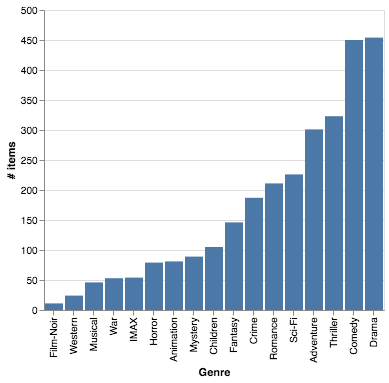

In [33]:
import altair as alt

alt.Chart(results_df).mark_bar().encode(y="# items",x=alt.X('Genre',
                                                            sort = alt.EncodingSortField(
                                                            field="# items",
                                                            order="ascending")))

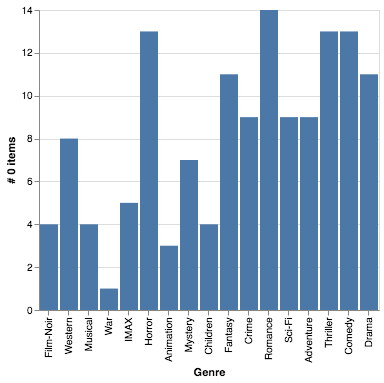

In [34]:
alt.Chart(results_df).mark_bar().encode(y="# 0 items",x=alt.X('Genre',
                                                            sort = alt.EncodingSortField(
                                                            field="# items",
                                                            order="ascending")))

### Rankability of each Genre

In [ ]:
num_shuffles = 10
#import random

for genre in genre_info.keys():
    print(genre)
    D = genre_info[genre]['D'].todense()
    if D.shape[0]>350:
        continue
    genre_info[genre]["k"],genre_info[genre]["details"] = pyrankability.hillside.count_lp(D)
    #Ddense[range(D.shape[0]),range(D.shape[1])] = np.NaN
    inxs = np.where(D > 0)
    D_avg1 = D.copy()
    avgs = []
    for i,j in zip(inxs[0],inxs[1]):
        avg = (D_avg1[j,i] + D_avg1[i,j])/2.
        D_avg1[j,i] = avg
        D_avg1[i,j] = avg 
        avgs.append(avg)
    D_avg2 = D.copy()
    D_avg2[inxs] = np.random.random((len(inxs[0]),))-0.5 + D.sum()*1./len(inxs[0])
    
    genre_info[genre]["k_avg1"],genre_info[genre]["details_avg1"] = pyrankability.hillside.count_lp(D_avg1)
    genre_info[genre]["k_avg2"],genre_info[genre]["details_avg2"] = pyrankability.hillside.count_lp(D_avg2)
    
    genre_info[genre]["k_avg_normal1"] = np.zeros((num_shuffles,))
    genre_info[genre]["k_avg_normal2"] = np.zeros((num_shuffles,))
    genre_info[genre]["details_avg_normal1"] = [None for i in range(num_shuffles)]
    genre_info[genre]["details_avg_normal2"] = [None for i in range(num_shuffles)]
    
    for s in range(num_shuffles):
        D_avg_normal1 = D.copy()
        D_avg_normal1[inxs] = np.random.choice(avgs,size=len(inxs[0]))
        genre_info[genre]["k_avg_normal1"][s],genre_info[genre]["details_avg_normal1"][s] = pyrankability.hillside.count_lp(D_avg_normal1)

        D_avg_normal2 = D.copy()
        D_avg_normal2[inxs] = np.random.choice(D[inxs].flat,size=len(inxs[0]))
        genre_info[genre]["k_avg_normal2"][s],genre_info[genre]["details_avg_normal2"][s] = pyrankability.hillside.count_lp(D_avg_normal2)
        
    print_dict = {}
    for key in genre_info[genre].keys():
        if key[0] == 'k' and type(genre_info[genre][key]) == int:
            print_dict[key] = [genre_info[genre][key]]
        elif key[0] == 'k':
            print_dict["np.mean(%s)"%key] = [np.mean(genre_info[genre][key])]

    display(pd.DataFrame(print_dict))
        
"""
        
    #print(D.sum(),D_avg1.sum(),D_avg2.sum(),D_avg_normal1.sum(),D_avg_normal2.sum())
    
    genre_info[genre]["k_avg"],genre_info[genre]["details_avg"] = pyrankability.hillside.count_lp(D_shuffled)
    print("avg k",genre_info[genre]["k_avg"])
    genre_info[genre]["k_norm"] = 1-genre_info[genre]["k"]/genre_info[genre]["k_avg"]
    print("norm k",genre_info[genre]["k_norm"])
    #inxs_df = pd.DataFrame({"i":inxs[0],"j":inxs[1]})
    
    for s in range(num_shuffles):
            #if random.random()>0.5:
            #    D_shuffled[j,i],D_shuffled[i,j] = D_shuffled[i,j],D_shuffled[j,i]
            avg = (D_shuffled[j,i] + D_shuffled[i,j])/2.
            D_shuffled[j,i] = avg
            D_shuffled[i,j] = avg
        #inxs_df_shuffled = shuffle(inxs_df)
        #D_shuffled[inxs] = D_shuffled[(inxs_df_shuffled["i"],inxs_df_shuffled["j"])]
        k,details = pyrankability.hillside.count(D_shuffled)
        genre_info[genre]["k_shuffle"].append(k)
        print(s,k)"""

Adventure
Academic license - for non-commercial use only


,k,k_avg1,k_avg2,np.mean(k_avg_normal1),np.mean(k_avg_normal2)
0,4241802,4969994,4862904,4846060.6,4842415.9


Animation


,k,k_avg1,k_avg2,np.mean(k_avg_normal1),np.mean(k_avg_normal2)
0,89944,103487,99324,98764.5,98702.6


Children


,k,k_avg1,k_avg2,np.mean(k_avg_normal1),np.mean(k_avg_normal2)
0,197633,232627,223988,223260.3,223547.6


Comedy
Crime
